In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries and Data Loading

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.duplicated().sum()

0

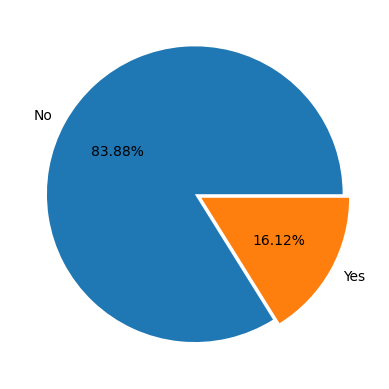

In [8]:
plt.pie(df['Attrition'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%', explode=[0,0.05])
plt.show()

In [9]:
categorical_cols = []
numerical_cols = []
for col in df.columns:
    if df[col].dtype==object:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [10]:
numerical_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
categorical_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

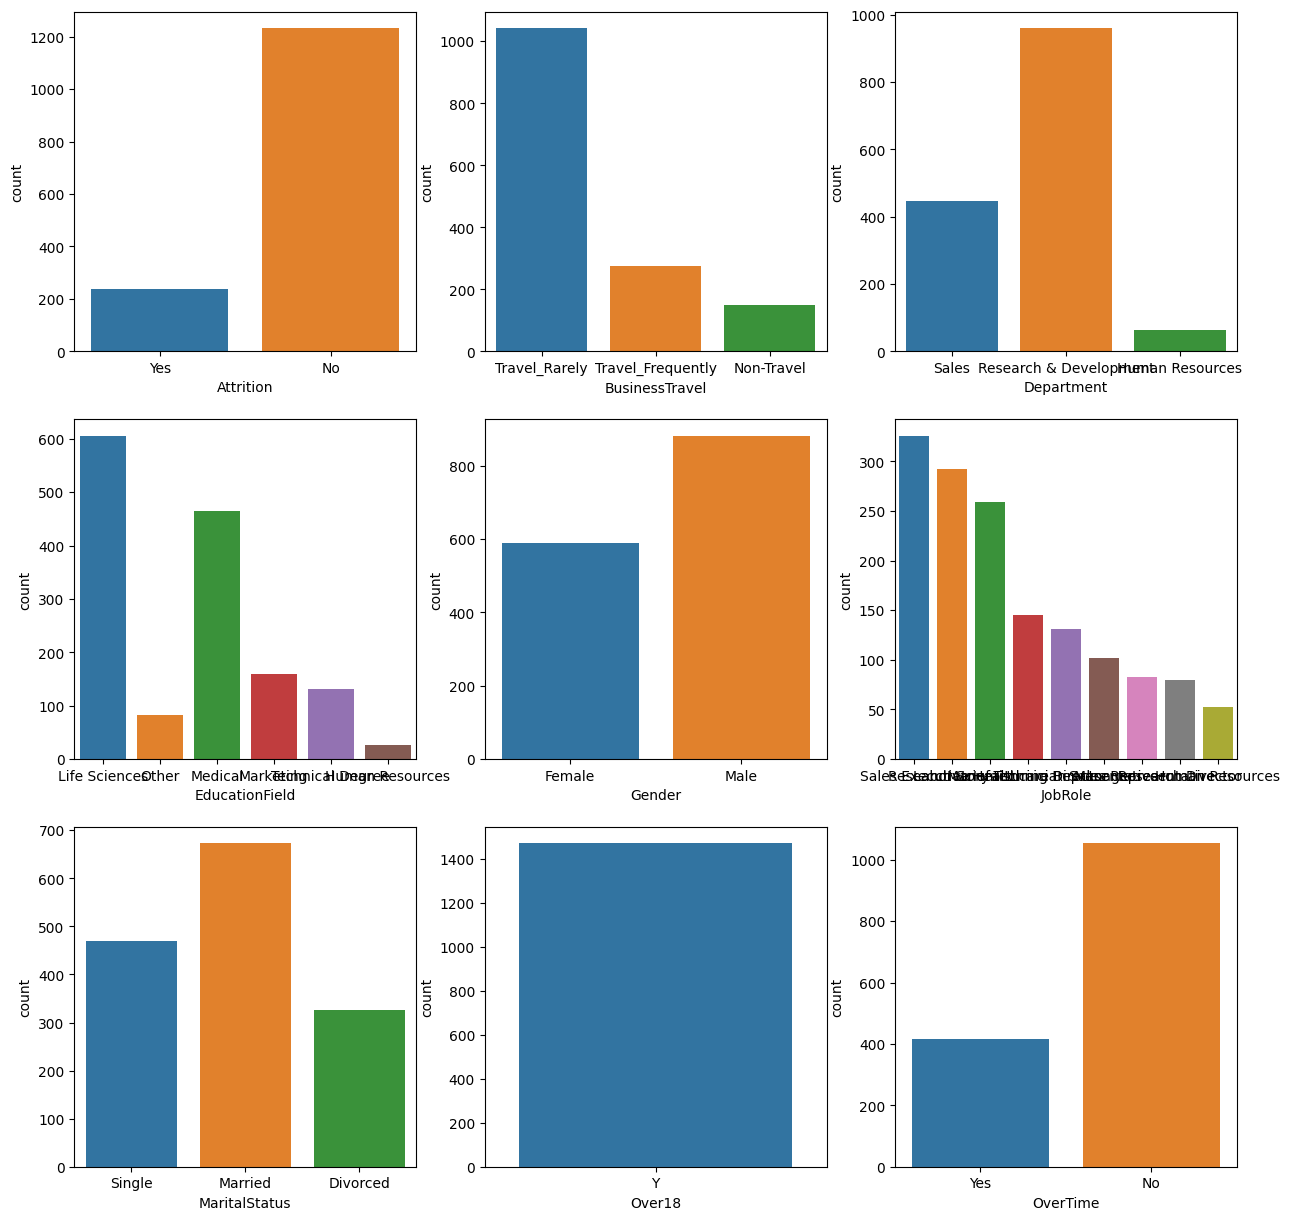

In [12]:
plt.figure(figsize=(15,15))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[col])
plt.show()

In [13]:
len(numerical_cols)

26

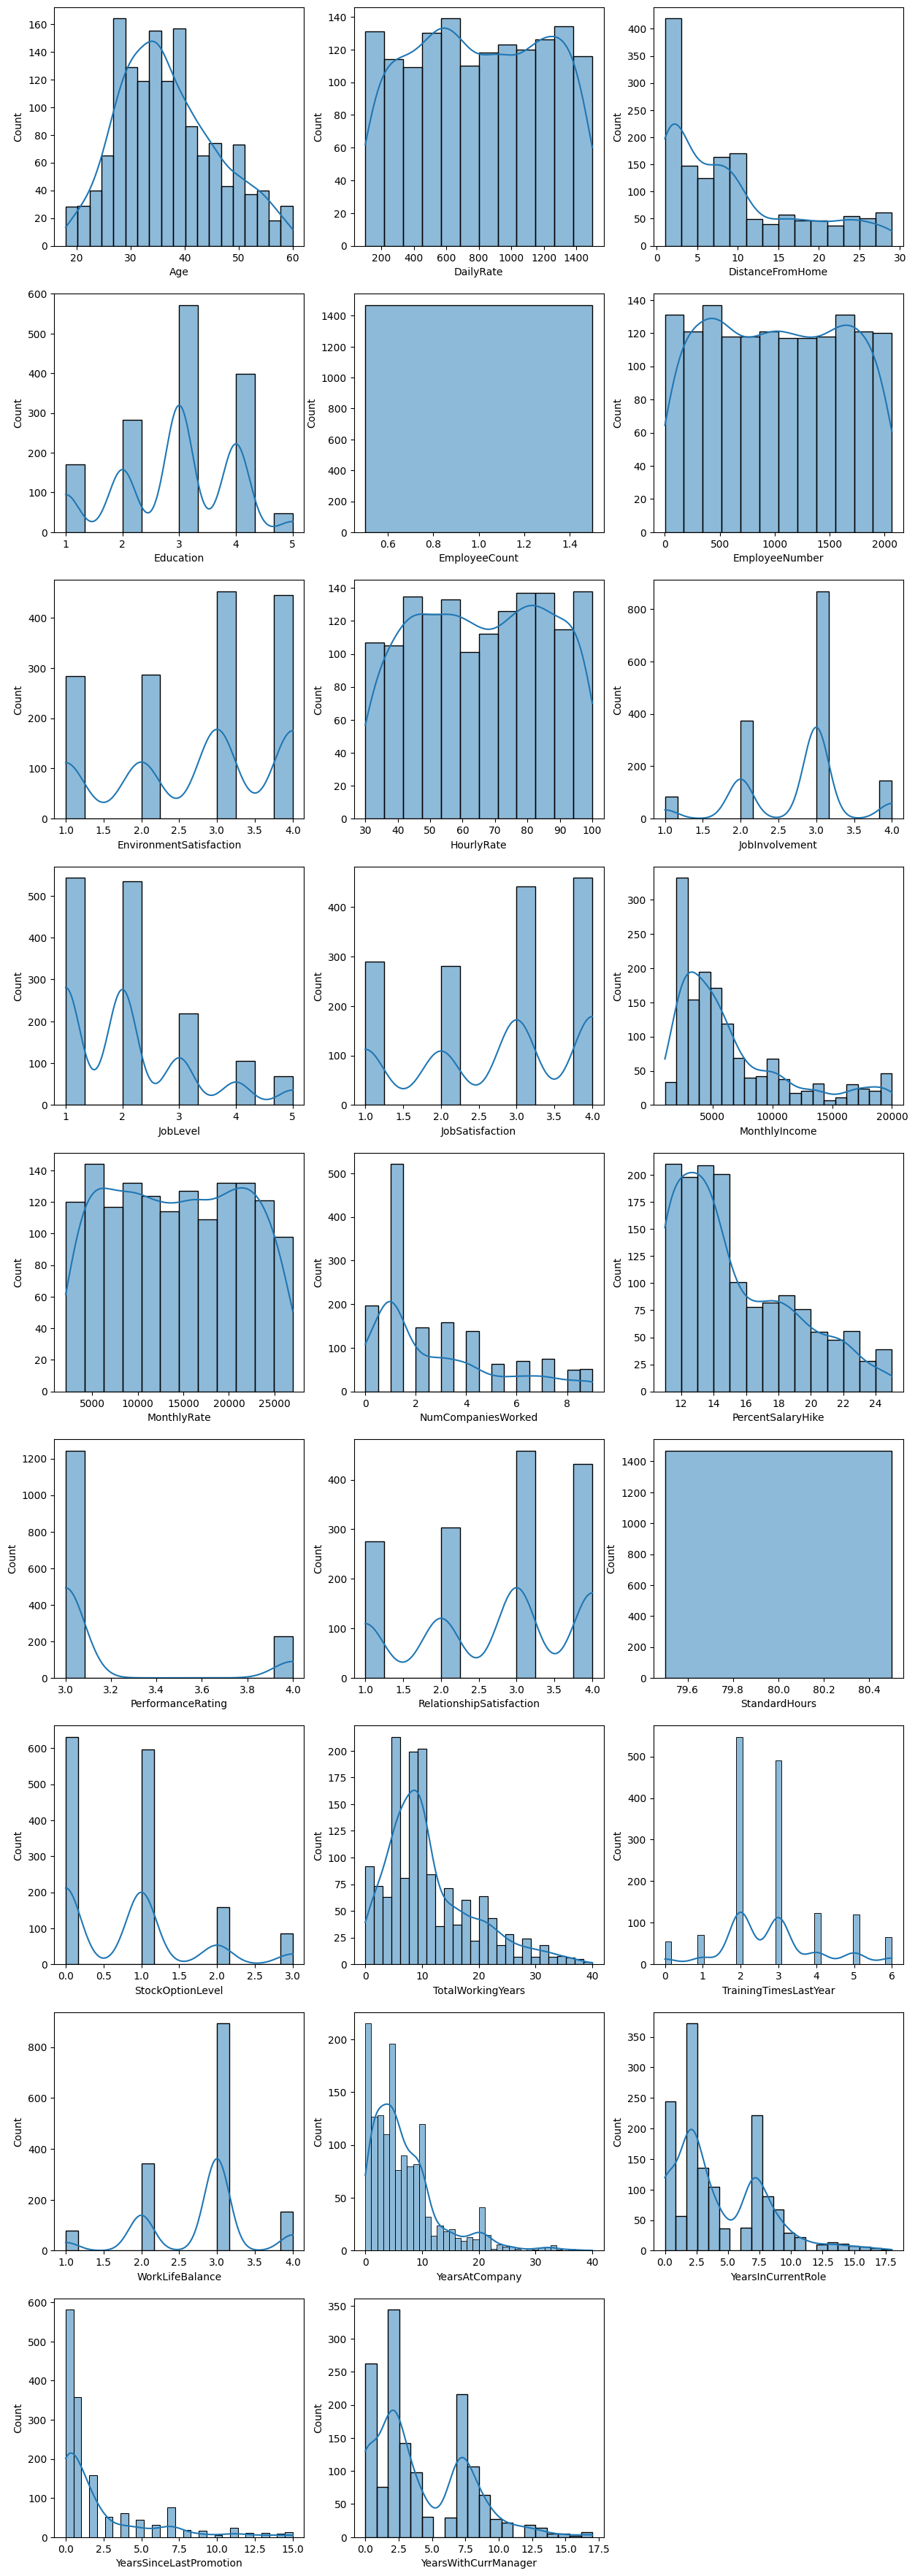

In [14]:
plt.figure(figsize=(15,45))
for i,col in enumerate(numerical_cols):
    plt.subplot(9,3,i+1)
    sns.histplot(x=df[col], kde=True)
plt.show()

In [15]:
df1 = df.copy()

In [16]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

In [19]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [20]:
df1.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df1[numerical_cols] = mms.fit_transform(df1[numerical_cols])

In [22]:
df1.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.161224,1.607483,0.501421,1.260544,0.292590,0.478231,2.247619,0.0,0.495339,...,0.570748,0.0,0.264626,0.28199,0.466553,0.587075,0.175204,0.234958,0.145850,0.242537
std,0.217509,0.367863,0.665455,0.288840,0.527792,0.289531,0.256041,1.331369,0.0,0.291255,...,0.360403,0.0,0.284026,0.19452,0.214878,0.235492,0.153163,0.201285,0.214829,0.209890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,1.000000,0.259843,1.000000,0.035714,0.250000,1.000000,0.0,0.237179,...,0.333333,0.0,0.000000,0.15000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647
50%,0.428571,0.000000,2.000000,0.501074,1.000000,0.214286,0.500000,2.000000,0.0,0.493227,...,0.666667,0.0,0.333333,0.25000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471
75%,0.595238,0.000000,2.000000,0.755190,2.000000,0.464286,0.750000,3.000000,0.0,0.752177,...,1.000000,0.0,0.333333,0.37500,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,5.000000,0.0,1.000000,...,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

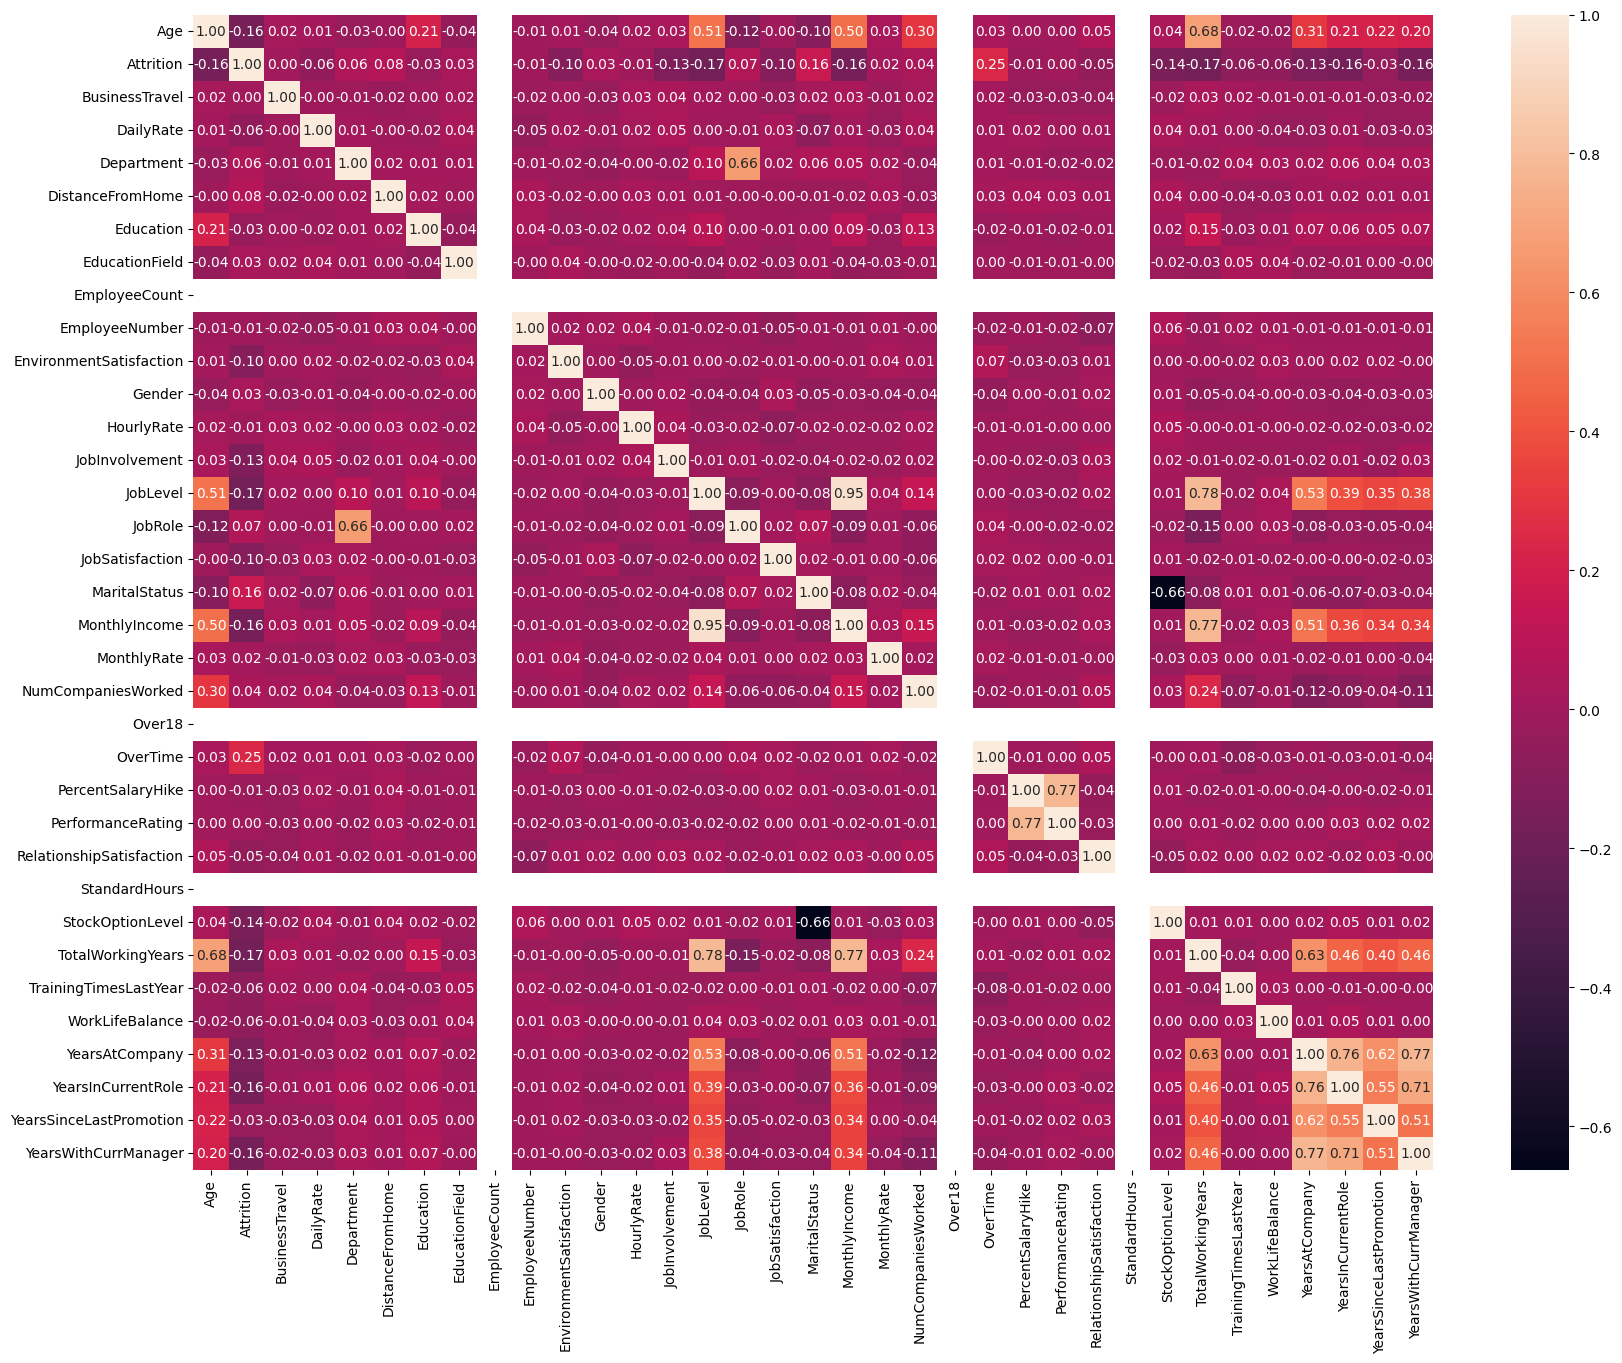

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True, fmt='0.2f')

# Model Building

In [24]:
x = df1.drop('Attrition', axis=1)
y = df1['Attrition']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1176, 34), (294, 34), (1176,), (294,))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [28]:
def model_fit_and_results(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score - Class 0': f1_score(y_test, y_test_pred, average=None)[0],
        'F1 Score - Class 1': f1_score(y_test, y_test_pred, average=None)[1],
        'Precision - Class 0': precision_score(y_test, y_test_pred, average=None)[0],
        'Precision - Class 1': precision_score(y_test, y_test_pred, average=None)[1],
        'Recall - Class 0': recall_score(y_test, y_test_pred, average=None)[0],
        'Recall - Class 1': recall_score(y_test, y_test_pred, average=None)[1]
    }
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    return results, cm

In [29]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(),
          GradientBoostingClassifier(), XGBClassifier()]

In [30]:
models_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']

In [31]:
results_list=[]
cm_list=[]
for i in range(len(models)):
    print(models_names[i])
    result, cm = model_fit_and_results(models[i], models_names[i], x_train, x_test, y_train, y_test)
    results_list.append(result)
    cm_list.append(cm)

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       245
           1       0.85      0.35      0.49        49

    accuracy                           0.88       294
   macro avg       0.87      0.67      0.71       294
weighted avg       0.88      0.88      0.86       294

Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       245
           1       0.30      0.37      0.33        49

    accuracy                           0.75       294
   macro avg       0.58      0.60      0.59       294
weighted avg       0.77      0.75      0.76       294

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       245
           1       0.78      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.82      0.57      0.58       294
weighted avg       0.84   

In [32]:
results_df = pd.DataFrame(results_list)
results_df

,Model,Train Accuracy,Test Accuracy,F1 Score - Class 0,F1 Score - Class 1,Precision - Class 0,Precision - Class 1,Recall - Class 0,Recall - Class 1
0,Logistic Regression,0.871599,0.880952,0.932563,0.492754,0.883212,0.850000,0.987755,0.346939
1,Decision Tree,1.000000,0.751701,0.847599,0.330275,0.867521,0.300000,0.828571,0.367347
2,Random Forest,1.000000,0.850340,0.916981,0.241379,0.852632,0.777778,0.991837,0.142857
3,Gradient Boosting,0.956633,0.860544,0.921002,0.405797,0.872263,0.700000,0.975510,0.285714
4,XGBoost,1.000000,0.853741,0.917148,0.376812,0.868613,0.650000,0.971429,0.265306


In [33]:
df1['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

# SMOTE

Applying smote to handle class imbalance

In [34]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
x_smote,y_smote=smote.fit_resample(x,y)
y_smote.value_counts()


Attrition
1    1233
0    1233
Name: count, dtype: int64

In [35]:
def model_fit_and_results_smote(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    results = {
        'Model-smote': model_name,
        'Train Accuracy - Smote': accuracy_score(y_train, y_train_pred),
        'Test Accuracy - Smote': accuracy_score(y_test, y_test_pred),
        'F1 Score - Class 0 - Smote': f1_score(y_test, y_test_pred, average=None)[0],
        'F1 Score - Class 1 - Smote': f1_score(y_test, y_test_pred, average=None)[1],
        'Precision - Class 0 - Smote': precision_score(y_test, y_test_pred, average=None)[0],
        'Precision - Class 1 - Smote': precision_score(y_test, y_test_pred, average=None)[1],
        'Recall - Class 0 - Smote': recall_score(y_test, y_test_pred, average=None)[0],
        'Recall - Class 1 - Smote': recall_score(y_test, y_test_pred, average=None)[1]
    }
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    return results, cm

In [36]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote,y_smote,test_size=0.2, random_state=0)
x_train_smote.shape, x_test_smote.shape, y_train_smote.shape, y_test_smote.shape

((1972, 34), (494, 34), (1972,), (494,))

In [37]:
results_list_smote=[]
cm_list_smote=[]
for i in range(len(models)):
    print(models_names[i])
    result, cm = model_fit_and_results_smote(models[i], models_names[i], x_train_smote, x_test_smote, y_train_smote, y_test_smote)
    results_list_smote.append(result)
    cm_list_smote.append(cm)

Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       231
           1       0.76      0.80      0.78       263

    accuracy                           0.76       494
   macro avg       0.76      0.75      0.75       494
weighted avg       0.76      0.76      0.76       494

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       231
           1       0.87      0.83      0.85       263

    accuracy                           0.84       494
   macro avg       0.84      0.85      0.84       494
weighted avg       0.85      0.84      0.84       494

Random Forest
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       231
           1       0.97      0.92      0.95       263

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94   

In [38]:
results_df_smote = pd.DataFrame(results_list_smote)
results_df_smote

,Model-smote,Train Accuracy - Smote,Test Accuracy - Smote,F1 Score - Class 0 - Smote,F1 Score - Class 1 - Smote,Precision - Class 0 - Smote,Precision - Class 1 - Smote,Recall - Class 0 - Smote,Recall - Class 1 - Smote
0,Logistic Regression,0.756085,0.757085,0.730942,0.778598,0.758140,0.756272,0.705628,0.802281
1,Decision Tree,1.000000,0.844130,0.837895,0.849903,0.815574,0.872000,0.861472,0.828897
2,Random Forest,1.000000,0.943320,0.940928,0.945525,0.917695,0.968127,0.965368,0.923954
3,Gradient Boosting,0.966531,0.900810,0.898969,0.902584,0.858268,0.945833,0.943723,0.863118
4,XGBoost,1.000000,0.910931,0.907563,0.914062,0.881633,0.939759,0.935065,0.889734


In [39]:
results_combined = pd.concat([results_df, results_df_smote], axis =1)
results_combined.drop('Model-smote', axis=1, inplace=True)
results_combined

,Model,Train Accuracy,Test Accuracy,F1 Score - Class 0,F1 Score - Class 1,Precision - Class 0,Precision - Class 1,Recall - Class 0,Recall - Class 1,Train Accuracy - Smote,Test Accuracy - Smote,F1 Score - Class 0 - Smote,F1 Score - Class 1 - Smote,Precision - Class 0 - Smote,Precision - Class 1 - Smote,Recall - Class 0 - Smote,Recall - Class 1 - Smote
0,Logistic Regression,0.871599,0.880952,0.932563,0.492754,0.883212,0.850000,0.987755,0.346939,0.756085,0.757085,0.730942,0.778598,0.758140,0.756272,0.705628,0.802281
1,Decision Tree,1.000000,0.751701,0.847599,0.330275,0.867521,0.300000,0.828571,0.367347,1.000000,0.844130,0.837895,0.849903,0.815574,0.872000,0.861472,0.828897
2,Random Forest,1.000000,0.850340,0.916981,0.241379,0.852632,0.777778,0.991837,0.142857,1.000000,0.943320,0.940928,0.945525,0.917695,0.968127,0.965368,0.923954
3,Gradient Boosting,0.956633,0.860544,0.921002,0.405797,0.872263,0.700000,0.975510,0.285714,0.966531,0.900810,0.898969,0.902584,0.858268,0.945833,0.943723,0.863118
4,XGBoost,1.000000,0.853741,0.917148,0.376812,0.868613,0.650000,0.971429,0.265306,1.000000,0.910931,0.907563,0.914062,0.881633,0.939759,0.935065,0.889734


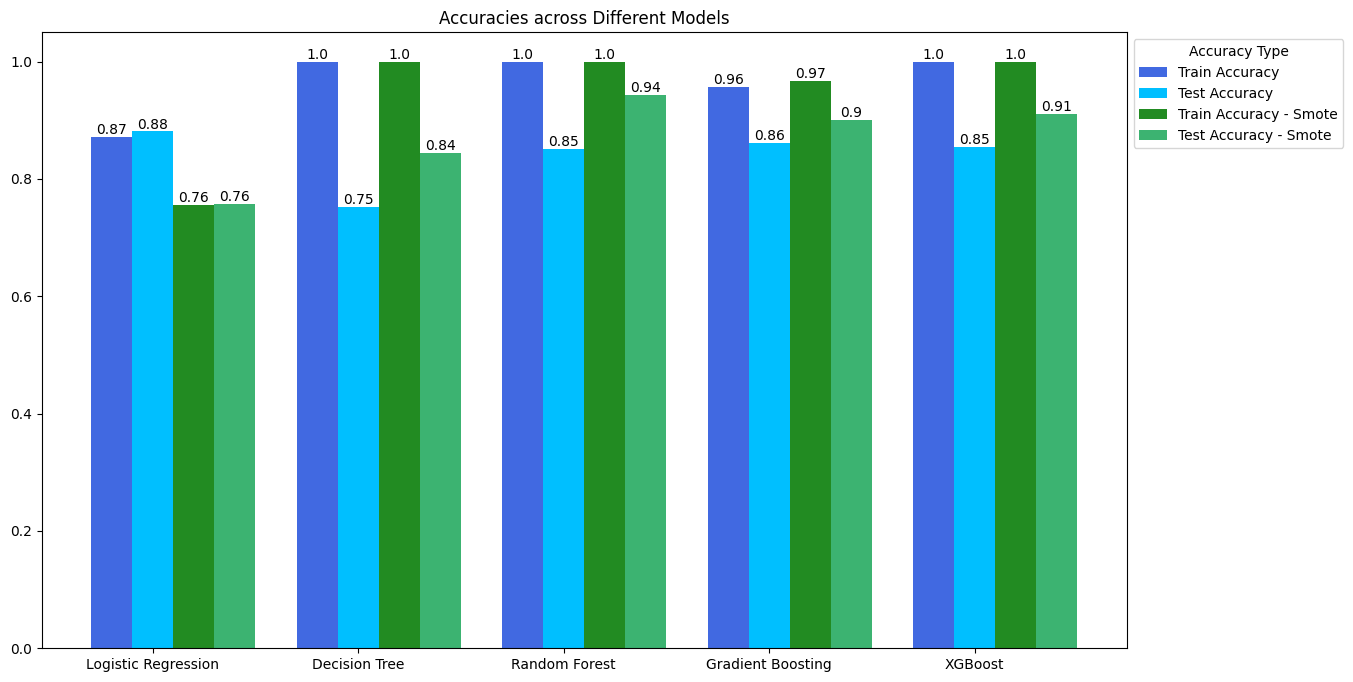

In [40]:
w_bar = 0.2
plt.figure(figsize=(14, 8))
plt.title('Accuracies across Different Models')

# Bar positions for multiple sets of data
bar1 = np.arange(len(results_combined['Model']))
bar2 = [i + w_bar for i in bar1]
bar3 = [i + w_bar for i in bar2]
bar4 = [i + w_bar for i in bar3]

# Create bars with distinct colors for normal (blue shades) and SMOTE (green shades)
bars_train = plt.bar(bar1, results_combined['Train Accuracy'], width=w_bar, color='royalblue', label='Train Accuracy')
bars_test = plt.bar(bar2, results_combined['Test Accuracy'], width=w_bar, color='deepskyblue', label='Test Accuracy')
bars_train_smote = plt.bar(bar3, results_combined['Train Accuracy - Smote'], width=w_bar, color='forestgreen', label='Train Accuracy - Smote')
bars_test_smote = plt.bar(bar4, results_combined['Test Accuracy - Smote'], width=w_bar, color='mediumseagreen', label='Test Accuracy - Smote')

# Add data labels to the bars
plt.bar_label(bars_train, labels=results_combined['Train Accuracy'].round(2))
plt.bar_label(bars_train_smote, labels=results_combined['Train Accuracy - Smote'].round(2))
plt.bar_label(bars_test, labels=results_combined['Test Accuracy'].round(2))
plt.bar_label(bars_test_smote, labels=results_combined['Test Accuracy - Smote'].round(2))

# Set x-ticks to model names
plt.xticks(bar2, results_combined['Model'], ha='center')

# Adjust the position of the legend to avoid overlap with bars
plt.legend(title='Accuracy Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


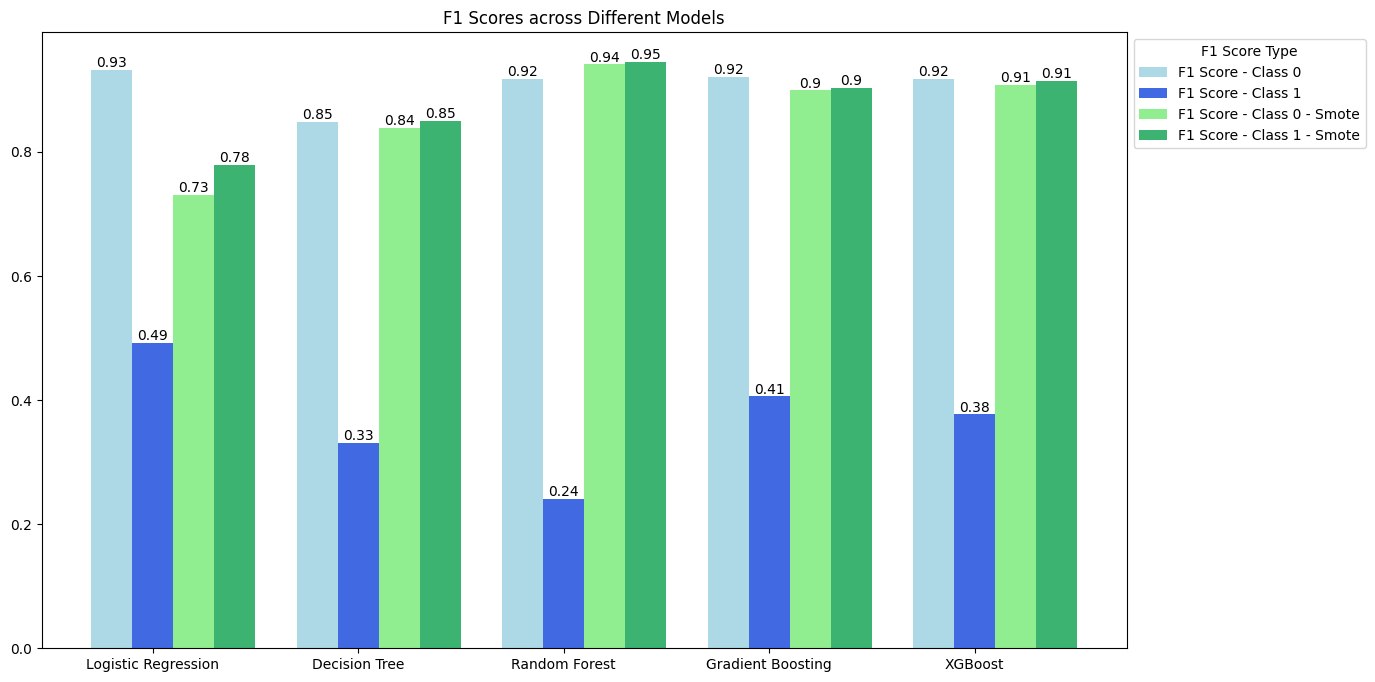

In [41]:
w_bar = 0.2
plt.figure(figsize=(14, 8))
plt.title('F1 Scores across Different Models')

# Bar positions for multiple sets of data
bar1 = np.arange(len(results_combined['Model']))
bar2 = [i + w_bar for i in bar1]
bar3 = [i + w_bar for i in bar2]
bar4 = [i + w_bar for i in bar3]

# Create bars with distinct colors for normal (blue shades) and SMOTE (green shades)
bars_0 = plt.bar(bar1, results_combined['F1 Score - Class 0'], width=w_bar, color='lightblue', label='F1 Score - Class 0')
bars_1 = plt.bar(bar2, results_combined['F1 Score - Class 1'], width=w_bar, color='royalblue', label='F1 Score - Class 1')
bars_0_smote = plt.bar(bar3, results_combined['F1 Score - Class 0 - Smote'], width=w_bar, color='lightgreen', label='F1 Score - Class 0 - Smote')
bars_1_smote = plt.bar(bar4, results_combined['F1 Score - Class 1 - Smote'], width=w_bar, color='mediumseagreen', label='F1 Score - Class 1 - Smote')

# Add data labels to the bars
plt.bar_label(bars_0, labels=results_combined['F1 Score - Class 0'].round(2))
plt.bar_label(bars_1, labels=results_combined['F1 Score - Class 1'].round(2))
plt.bar_label(bars_0_smote, labels=results_combined['F1 Score - Class 0 - Smote'].round(2))
plt.bar_label(bars_1_smote, labels=results_combined['F1 Score - Class 1 - Smote'].round(2))

# Set x-ticks to model names
plt.xticks(bar2, results_combined['Model'], ha='center')

# Adjust the position of the legend to avoid overlap with bars
plt.legend(title='F1 Score Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


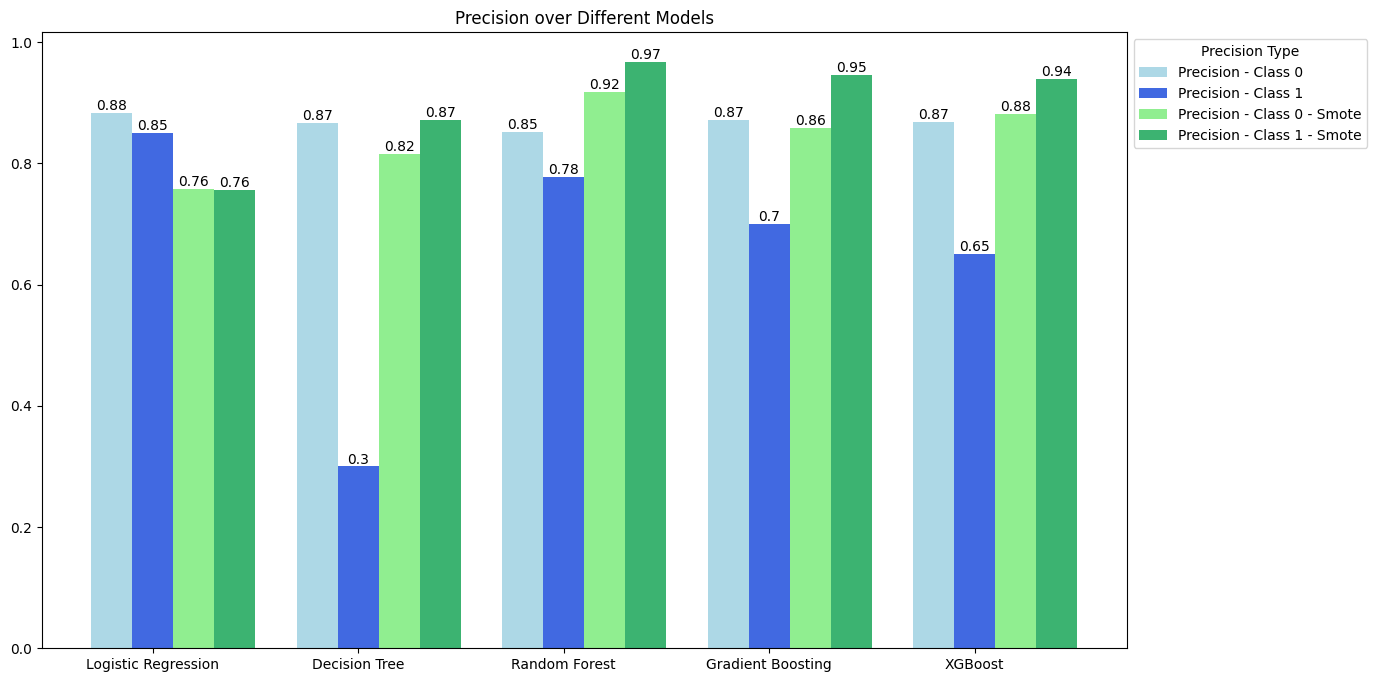

In [42]:
w_bar = 0.2
plt.figure(figsize=(14, 8))
plt.title('Precision over Different Models')

# Bar positions for multiple sets of data
bar1 = np.arange(len(results_combined['Model']))
bar2 = [i + w_bar for i in bar1]
bar3 = [i + w_bar for i in bar2]
bar4 = [i + w_bar for i in bar3]

# Create bars with distinct colors for normal (blue shades) and SMOTE (green shades)
bars_0 = plt.bar(bar1, results_combined['Precision - Class 0'], width=w_bar, color='lightblue', label='Precision - Class 0')
bars_1 = plt.bar(bar2, results_combined['Precision - Class 1'], width=w_bar, color='royalblue', label='Precision - Class 1')
bars_0_smote = plt.bar(bar3, results_combined['Precision - Class 0 - Smote'], width=w_bar, color='lightgreen', label='Precision - Class 0 - Smote')
bars_1_smote = plt.bar(bar4, results_combined['Precision - Class 1 - Smote'], width=w_bar, color='mediumseagreen', label='Precision - Class 1 - Smote')

# Add data labels to the bars
plt.bar_label(bars_0, labels=results_combined['Precision - Class 0'].round(2))
plt.bar_label(bars_1, labels=results_combined['Precision - Class 1'].round(2))
plt.bar_label(bars_0_smote, labels=results_combined['Precision - Class 0 - Smote'].round(2))
plt.bar_label(bars_1_smote, labels=results_combined['Precision - Class 1 - Smote'].round(2))

# Set x-ticks to model names
plt.xticks(bar2, results_combined['Model'], ha='center')

# Adjust the position of the legend to avoid overlap with bars
plt.legend(title='Precision Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


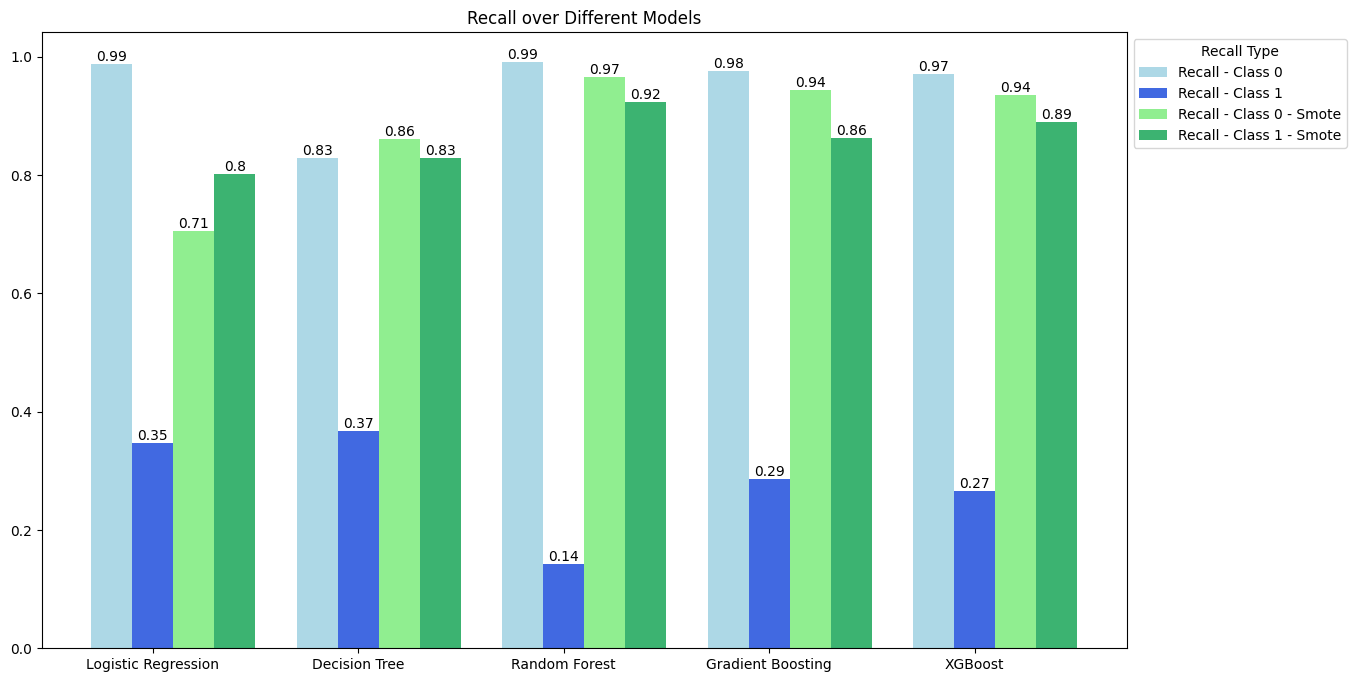

In [43]:
w_bar = 0.2
plt.figure(figsize=(14, 8))
plt.title('Recall over Different Models')

# Bar positions for multiple sets of data
bar1 = np.arange(len(results_combined['Model']))
bar2 = [i + w_bar for i in bar1]
bar3 = [i + w_bar for i in bar2]
bar4 = [i + w_bar for i in bar3]

# Create bars with distinct colors for normal (blue shades) and SMOTE (green shades)
bars_0 = plt.bar(bar1, results_combined['Recall - Class 0'], width=w_bar, color='lightblue', label='Recall - Class 0')
bars_1 = plt.bar(bar2, results_combined['Recall - Class 1'], width=w_bar, color='royalblue', label='Recall - Class 1')
bars_0_smote = plt.bar(bar3, results_combined['Recall - Class 0 - Smote'], width=w_bar, color='lightgreen', label='Recall - Class 0 - Smote')
bars_1_smote = plt.bar(bar4, results_combined['Recall - Class 1 - Smote'], width=w_bar, color='mediumseagreen', label='Recall - Class 1 - Smote')

# Add data labels to the bars
plt.bar_label(bars_0, labels=results_combined['Recall - Class 0'].round(2))
plt.bar_label(bars_1, labels=results_combined['Recall - Class 1'].round(2))
plt.bar_label(bars_0_smote, labels=results_combined['Recall - Class 0 - Smote'].round(2))
plt.bar_label(bars_1_smote, labels=results_combined['Recall - Class 1 - Smote'].round(2))

# Set x-ticks to model names
plt.xticks(bar2, results_combined['Model'], ha='center')

# Adjust the position of the legend to avoid overlap with bars
plt.legend(title='Recall Type', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


Using Smote clearly improved the models performances